# Machine Learning Reminder
* Find f(x) such that f(x) best approximates y
* Examples:
    * Given some pixels (x) tell me the probability it’s a cat (y)
    * Given news articles (x) tell me a stocks value (y)
    * Given some sequences x find some low dimensional space (z) that represent my data 
      * f1(x)=z f2(z)=x  

# Outline
* Dense (Fully Connected Neural Networks)
  * Example Regression Fits
 
# Goals

Dense Neural Netrworks are an essential building block used in Deep Learning image analysis our goals are:
* Know what a Dense Neural Network is
    * Know what an activation function is and what it does
* Know how to write a Dense Neural Network
* How do I train a Dense Neural Network
    * Experiment with hyperparameters


# Packages

We're going to be working primarily with Keras and Tensorflow. They're some alternatives like PyTorch, but they all allow you to build ML models.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Our first Layer
A Dense or fully connected layer

<img src="../../assets/network_diagrams/dense.png">

A dense layer has a connection between every input variable and every output node. Each connection is represented by a weight $W_{i,n}$ from and input $X_n$ to an output $O_i$. The output is a sum over all the input variables times there weights plus a bias $B_i$
<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

We will need to fit this to data, which means finding the best values for $W_{i,n}$ and $B_i$ to approximate our data.

We will often also stack layers $l$, so the output of one layer feeds into the next

$O_{i,l} = \sigma(\sum_n W_{i,l,n}*O_{i,l-1}+B_{i,l})$   


* We'll discuss this more in later in the lecture, but it's important when stacking layers we use an non-linear activation function $\sigma$

<img src="../../assets/network_diagrams/nn_3_3_3.png">



# When to use a Dense Network

* When you have fixed input size and a fixed output size 
* When your input size isn't too big
    * We'll have to add something extra for image data
    
# Practice Building Networks

## Keras organizes a network by layers

Look at the code below, It has 
* One input layer with an input size = 3 
* One output layer and an output size = 1
* A layer is connect to a previous layer by passing the previous layer as an argument
  * i.e   
  output_layer=**tf.keras.layers.Dense**(*these arguments initialize the layer* )(**input_layer** *this argument connects the layers* ) #this call is to connect to input layer
  
## Networks are wrapped up into a Model

A model tells Keras which inputs/outputs you want to use for example

**linear_model=tf.keras.models.Model(input_layer,output_layer)**

you'll need this model to fit to your data


In [2]:
# All models start out with an input layer
input_layer=tf.keras.layers.Input(shape=(3,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is class used for fitting it takes input layers and output layers
linear_model=tf.keras.models.Model(input_layer,output_layer)

linear_model.summary()
model_type=type(linear_model)
print(model_type)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
<class 'keras.engine.functional.Functional'>


2022-01-27 11:54:07.364568: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 11:54:07.765156: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11409 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0000:05:00.0, compute capability: 3.7


The above layer has 4 parameters (a weight for each connection, and one bias term)

We can represent it like this
<img src="../../assets/network_diagrams/nn_3_1.png">


Layers can be stacked into more complex networks let's build this one

<img src="../../assets/network_diagrams/nn_3_3_1.png">




In [3]:
# All models start out with an input layer
input_layer=tf.keras.layers.Input(shape=(3,)) 
hidden_layer=tf.keras.layers.Dense(3)(input_layer) 
output_layer = tf.keras.layers.Dense(1)(hidden_layer)
#A keras model is class used for fitting it takes input layers and output layers
linear_model=tf.keras.models.Model(input_layer,output_layer)

linear_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


# Try building the following networks yourself

Try writing code to make the following networks
* 1. Create an Input Layer
* 2. Write Dense layers with the right number of units
* 3. Make Model name **my_model** using the input layer and your output layer


## Example 1
<img src="../../assets/network_diagrams/nn_3_3_3.png">


In [4]:
"Your Code Here"

# All models start out with an input layer
input_layer=tf.keras.layers.Input(shape=(3,)) 
hidden_layer=tf.keras.layers.Dense(3)(input_layer) 
output_layer = tf.keras.layers.Dense(3)(hidden_layer)

my_model=tf.keras.models.Model(input_layer,output_layer)

my_model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""run this to check your answer"""
print(my_model.layers[0].output_shape)

assert 'my_model' in locals(), "my_model doesn't exist did you get the name correct for your model"
print('Found my model')
assert type(my_model)==model_type, "my model dosen't see to be a keras model try tf.keras.models.Model"
assert len(my_model.layers)==3, "Your model has "+str(len(my_model.layers))+" layers and should have 3"
assert my_model.layers[0].output_shape[0][1]==3, "Input isn't 3 dimensional"
assert my_model.layers[1].output_shape[1]==3, "Hidden layer isn't 3 dimensional"
assert my_model.layers[2].output_shape[1]==3, "Output layer isn't 3 dimensional"
print('Great Job Model is Correct')


[(None, 3)]
Found my model
Great Job Model is Correct


## Example 2

<img src="../../assets/network_diagrams/nn_3_3_3_3.png">


In [6]:
"Your Code Here"
input_layer=tf.keras.layers.Input(shape=(3,)) 
hidden_layer_1=tf.keras.layers.Dense(3)(input_layer) 
hidden_layer_2=tf.keras.layers.Dense(3)(hidden_layer_1) 
output_layer = tf.keras.layers.Dense(3)(hidden_layer_2)

my_model=tf.keras.models.Model(input_layer,output_layer)

my_model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""run this to check your answer"""
my_model.layers[0]

assert 'my_model' in locals(), "my_model doesn't exist did you get the name correct for your model"
print('Found my model')
assert type(my_model)==model_type, "my_model doesn't see to be a keras model try tf.keras.models.Model"
assert len(my_model.layers)==4, "Your model has "+str(len(my_model.layers))+" layers and should have 4"
assert my_model.layers[0].output_shape[0][1]==3, "Input isn't 3 dimensional"
assert my_model.layers[1].output_shape[1]==3, "Hidden 1 layer isn't 3 dimensional"
assert my_model.layers[2].output_shape[1]==3, "Hidden 2 layer isn't 3 dimensional"
assert my_model.layers[3].output_shape[1]==3, "Output layer isn't 3 dimensional"
print('Great Job Model is Correct')


Found my model
Great Job Model is Correct


## Example 3

<img src="../../assets/network_diagrams/nn_3_5_3.png">


In [8]:
"Your Code Here"

input_layer=tf.keras.layers.Input(shape=(3,)) 
hidden_layer=tf.keras.layers.Dense(5)(input_layer) 
output_layer = tf.keras.layers.Dense(3)(hidden_layer)

my_model=tf.keras.models.Model(input_layer,output_layer)

my_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 18        
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""run this to check your answer"""
assert 'my_model' in locals(), "my_model doesn't exist did you get the name correct for your model"
print('Found my model')
assert type(my_model)==model_type, "my_model doesn't see to be a keras model try tf.keras.models.Model"
assert len(my_model.layers)==3, "Your model has "+str(len(my_model.layers))+" layers and should have 4"
assert my_model.layers[0].output_shape[0][1]==3, "Input isn't 3 dimensional"
assert my_model.layers[1].output_shape[1]==5, "Hidden 1 layer isn't 5 dimensional"
assert my_model.layers[2].output_shape[1]==3, "Hidden 2 layer isn't 3 dimensional"
print('Great Job Model is Correct')


Found my model
Great Job Model is Correct


#  Model Design
* Input dimension is defined by the input data
* Output dimension is defined by target data
* Hidden layers add complexity to the model
    * More hidden layers or larger hidden layer dimensions can represent more complicated functions
    * Too many layers can be hard to train without special tricks
        * Can overfit, or fail to train (more on that later)
    * Too few layers may not correctly describe the data
* The right balance depends on the problem
    * Roughly the more data the more layers you can use
    * The more complex the target the more layers you'll need
* No right answer feel free to experiment

# Fitting your Model
Lets try to fit a simple line using the model below

<img src="../../assets/network_diagrams/nn_3_1.png">


In [10]:
# All models start out with an input layer
input_layer=tf.keras.layers.Input(shape=(3,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is class used for fitting it takes input layers and output layers
linear_model=tf.keras.models.Model(input_layer,output_layer)

linear_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In the code above we define an Input layer and one Dense (Fully Connected Layer), in our equation above
i=1 n=data_dim
if data_dim ==1
then 

$O_i = \sum_n W_{i,n}*X_n+B_i  = O_0 =  W_{0,0}*X_0+B_0$

You'll notice from last lecture this is the same form as our linear model.

* $y_{pred,i}=\theta_{1}*x_{i}+\theta_{2} $

* Each 'neuron' in a dense network is one linear model

in neural network lingo 
*  $W$ is called the weight matrix 
*  $B$ the bias
*  $W$ is a matrix and can have several parameters and all the parameters in the network are often represented by just $\theta$ 

Just as in our Linear model we are going to use the same loss function
* $L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$
* which is Mean Squared Error or mse for short
* and we will pick an optimizer 'adam'




## Task: Fit a slightly harder straight line

We're going to make a data set where x is a series of 3 features, and a target value $y = 2*x_0+1$ 

$y$ is just a line with respect to $x_0$, and completely ignores $x_{1,2,3,4}$ 

This problem is a little bit more difficult than the 1st lecture since we need to learn that two of the input features don't correlate at all to the output.

In [11]:
#Build the Dataset

data_dim=3

X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return 2*X[:,0]+1  # #Ignore all other input have the output only depend on the first dimention
Y=func(X)




    
    

In [12]:

#MSE= Mean Squared Error 
linear_model.compile(loss='mse',optimizer='adam')

# Fit Our Simple Neural Network
#Fit 
linear_model.fit(X,Y,epochs=100,validation_split=0.5) #Have Keras make a test/validation split for us

#Pro tip, don't want to split the dataset yourself, you can have keras do it for you with validation_split=

# Even more Pro-tip - be careful if you run this cell more than once you'll keep training the same model 
# with a different train/develop split each time which can cause the model to overfit both the train and develop
# sets - a problem you'll only see when using the test set, so make sure to keep a test set around!


2022-01-27 11:54:08.427921: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 175.2912 - val_loss: 144.9739
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 118.2880 - val_loss: 96.2342
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 77.2085 - val_loss: 61.7592
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 48.7155 - val_loss: 38.4546
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 29.8738 - val_loss: 23.3637
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 18.0349 - val_loss: 14.2177
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 11.0368 - val_loss: 8.9072
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 7.1164 - val_loss: 6.0255
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 5.0281 - val_loss: 4.4851
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss:

Excellent you've fit your first neural network, now lets use it
* we split our initial dataset into a train/develop using validation split
* Lets make a new dataset that has X_0 from -5-15, with X_1,X_2 being random
    * This is just a way to plot the output


In [13]:
#Lets plot the output as a function of X_0

#Create some Random 5-d data
X_test=np.random.uniform(0,10,size=(100,data_dim))
#Set the first dimention to be a line
X_test[:,0]=np.linspace(-5,15,100)

#Get the True distribution from our test function
Y_test=func(X_test)

#Get the prediction from our model
Y_pred=linear_model.predict(X_test)




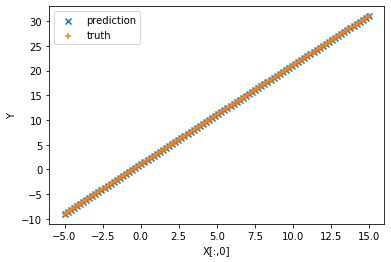

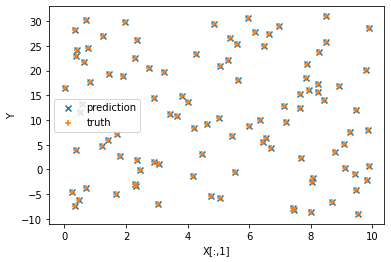

In [14]:
#Plot

plt.scatter(X_test[:,0],Y_pred,label='prediction',marker='x')
plt.scatter(X_test[:,0],Y_test,label='truth',marker='+')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()
plt.show()

#Lets Look at it wrt X[:,1]
plt.scatter(X_test[:,1],Y_pred,label='prediction',marker='x')
plt.scatter(X_test[:,1],Y_test,label='truth',marker='+')
plt.xlabel('X[:,1]')
plt.ylabel('Y')
plt.legend()
plt.show()



We can also look at a models weights
We expect $W_{0,0}$=2, and $B_0$=1

In [15]:
weights=linear_model.get_weights()
print("W=",weights[0])
print("W[0,0]=",weights[0][0,0])
print("B=",weights[1])


W= [[2.0000002e+00]
 [6.3670868e-08]
 [5.8151887e-08]]
W[0,0]= 2.0000002
B= [0.9999986]


# Try it yourself 
Run the cell below to create a similar data set, but this time with some noise

$y = 2*x_0+1+N(0,2)$ 


In [16]:
#Build the Dataset

data_dim=5

X_train=np.random.uniform(0,10,size=(10000,data_dim))
X_test=np.random.uniform(0,10,size=(10000,data_dim))

def func(X):
    return 2*X[:,0]+1 + np.random.normal(0,2,size=(len(X))) #Ignore all other input have the output only depend on the first dimention
Y_train=func(X_train)
Y_test=func(X_test)



In [17]:
"""Write your Model"""

"Your Code Here"
"split dataset"
"Input"
"Dense Layer"
"Create Model"
"Fit"


input_layer=tf.keras.layers.Input(shape=(5,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
my_model=tf.keras.models.Model(input_layer,output_layer)
my_model.compile(loss="mse",optimizer='adam')
my_model.fit(X_test,Y_test,epochs=20)





Epoch 1/20
313/313 [==============================] - 0s 942us/step - loss: 20.3416
Epoch 2/20
313/313 [==============================] - 0s 933us/step - loss: 13.8535
Epoch 3/20
313/313 [==============================] - 0s 940us/step - loss: 9.6247
Epoch 4/20
313/313 [==============================] - 0s 937us/step - loss: 6.9961
Epoch 5/20
313/313 [==============================] - 0s 936us/step - loss: 5.4636
Epoch 6/20
313/313 [==============================] - 0s 940us/step - loss: 4.6367
Epoch 7/20
313/313 [==============================] - 0s 934us/step - loss: 4.2361
Epoch 8/20
313/313 [==============================] - 0s 942us/step - loss: 4.0644
Epoch 9/20
313/313 [==============================] - 0s 929us/step - loss: 4.0018
Epoch 10/20
313/313 [==============================] - 0s 930us/step - loss: 3.9838
Epoch 11/20
313/313 [==============================] - 0s 937us/step - loss: 3.9778
Epoch 12/20
313/313 [==============================] - 0s 939us/step - loss: 3.9757

In [18]:
"""Test"""
Y_pred=my_model.predict(X_test)

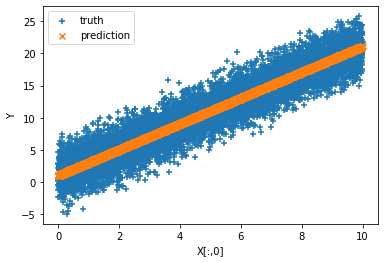

In [19]:
"""Plot"""
#Plot
plt.scatter(X_test[:,0],Y_test,label='truth',marker='+')
plt.scatter(X_test[:,0],Y_pred,label='prediction',marker='x')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()
plt.show()


Lets try something a bit more complicated a sin wave

In [20]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)


In [21]:

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is a way of going from one layer to the next
sine_model=tf.keras.models.Model(input_layer,output_layer)
sine_model.compile(loss='mse',optimizer='adam')
sine_model.fit(X,Y,epochs=15,validation_split=0.5) #Have Keras make a test/validation split for us





Epoch 1/15
157/157 [==============================] - 1s 2ms/step - loss: 33.0798 - val_loss: 20.9519
Epoch 2/15
157/157 [==============================] - 0s 2ms/step - loss: 15.6587 - val_loss: 12.8961
Epoch 3/15
157/157 [==============================] - 0s 2ms/step - loss: 11.2585 - val_loss: 10.1716
Epoch 4/15
157/157 [==============================] - 0s 2ms/step - loss: 9.0034 - val_loss: 8.1057
Epoch 5/15
157/157 [==============================] - 0s 2ms/step - loss: 7.1167 - val_loss: 6.3467
Epoch 6/15
157/157 [==============================] - 0s 2ms/step - loss: 5.5074 - val_loss: 4.8712
Epoch 7/15
157/157 [==============================] - 0s 2ms/step - loss: 4.1833 - val_loss: 3.6768
Epoch 8/15
157/157 [==============================] - 0s 2ms/step - loss: 3.1325 - val_loss: 2.7431
Epoch 9/15
157/157 [==============================] - 0s 2ms/step - loss: 2.3202 - val_loss: 2.0325
Epoch 10/15
157/157 [==============================] - 0s 2ms/step - loss: 1.7156 - val_loss: 

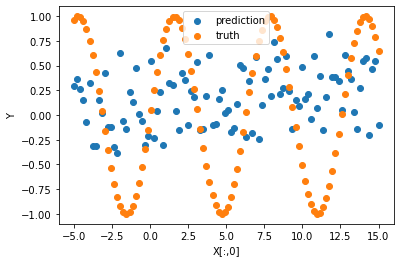

In [22]:
X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=sine_model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


Oops this didn't work. Why? So far what we wrote above can only represent linear functions

<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

we need to add something called an activation function $\sigma$

<p style="text-align: center;">
$O_i = \sigma(\sum_n W_{i,n}*X_n+B_i)$    
</p>

$\sigma$ has to be non-linear and a good choice is a LeakyReLU

<img src='../assets/leakyReLU.png'>

an activation can be added just like any other layer




Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 15.1586 - val_loss: 11.4824
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 9.6832 - val_loss: 8.0470
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 6.7769 - val_loss: 5.5696
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 4.6824 - val_loss: 3.8073
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 3.1789 - val_loss: 2.5625
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 2.1360 - val_loss: 1.7244
Epoch 7/20
157/157 [==============================] - 0s 2ms/step - loss: 1.4461 - val_loss: 1.1785
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 1.0098 - val_loss: 0.8461
Epoch 9/20
157/157 [==============================] - 0s 2ms/step - loss: 0.7465 - val_loss: 0.6556
Epoch 10/20
157/157 [==============================] - 0s 2ms/step - loss: 0.5983 - val_loss: 0.55

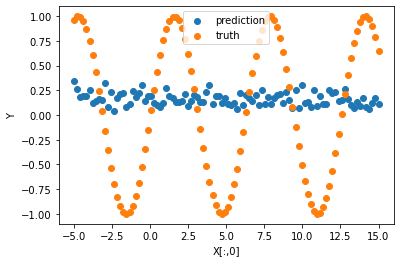

In [23]:

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 

activation_layer = tf.keras.layers.LeakyReLU()(input_layer)

output_layer = tf.keras.layers.Dense(1)(activation_layer)

#A keras model is a way of going from one layer to the next
sine_model=tf.keras.models.Model(input_layer,output_layer)

sine_model.compile(loss='mse',optimizer='adam')
sine_model.fit(X,Y,epochs=20,validation_split=0.5) #Have Keras make a test/validation split for us

Y_pred=sine_model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()

#  Still not very good, let's add an activated hidden layer to get more flexibility

Epoch 1/200
157/157 [==============================] - 1s 2ms/step - loss: 1.2220 - val_loss: 0.4909
Epoch 2/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4679 - val_loss: 0.4841
Epoch 3/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4591 - val_loss: 0.4814
Epoch 4/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4558 - val_loss: 0.4629
Epoch 5/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4495 - val_loss: 0.4647
Epoch 6/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4470 - val_loss: 0.4552
Epoch 7/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4411 - val_loss: 0.4512
Epoch 8/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4381 - val_loss: 0.4498
Epoch 9/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4338 - val_loss: 0.4414
Epoch 10/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4338 - val_lo

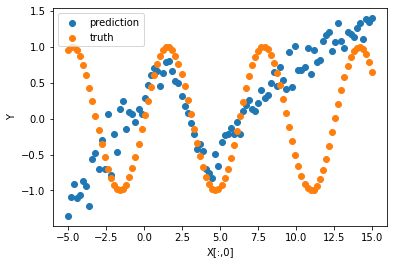

In [24]:
# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
hidden_layer = tf.keras.layers.Dense(20)(input_layer)
activation_layer = tf.keras.layers.LeakyReLU()(hidden_layer)
output_layer = tf.keras.layers.Dense(1)(activation_layer)
#A keras model is a way of going from one layer to the next
sine_model=tf.keras.models.Model(input_layer,output_layer)

sine_model.compile(loss='mse',optimizer='adam')
sine_model.fit(X,Y,epochs=200,validation_split=0.5) #Have Keras make a test/validation split for us

Y_pred=sine_model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


Still not very good. Let's also make our model a bit more powerful, by adding more layers $l$

<p style="text-align: center;">
$O_i,o=X_i$
</p>
 
<p style="text-align: center;">  
$O_{i,l} = \sigma(\sum_n W_{i,l,n}*O_{i,l-1}+B_{i,l})$    
</p>

Epoch 1/200
157/157 [==============================] - 1s 3ms/step - loss: 0.4775 - val_loss: 0.4482
Epoch 2/200
157/157 [==============================] - 0s 2ms/step - loss: 0.4157 - val_loss: 0.4112
Epoch 3/200
157/157 [==============================] - 0s 2ms/step - loss: 0.3827 - val_loss: 0.3738
Epoch 4/200
157/157 [==============================] - 0s 2ms/step - loss: 0.3490 - val_loss: 0.3408
Epoch 5/200
157/157 [==============================] - 0s 2ms/step - loss: 0.3145 - val_loss: 0.2953
Epoch 6/200
157/157 [==============================] - 0s 2ms/step - loss: 0.2771 - val_loss: 0.2661
Epoch 7/200
157/157 [==============================] - 0s 2ms/step - loss: 0.2497 - val_loss: 0.2579
Epoch 8/200
157/157 [==============================] - 0s 2ms/step - loss: 0.2340 - val_loss: 0.2249
Epoch 9/200
157/157 [==============================] - 0s 2ms/step - loss: 0.2205 - val_loss: 0.1964
Epoch 10/200
157/157 [==============================] - 0s 2ms/step - loss: 0.1935 - val_lo

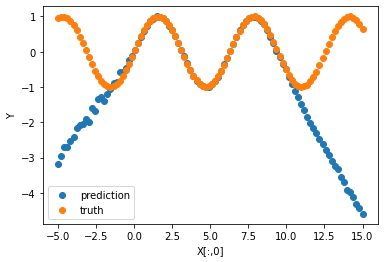

In [25]:
# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 

hidden_layer = tf.keras.layers.Dense(20)(input_layer)
activation_layer = tf.keras.layers.LeakyReLU()(hidden_layer)

hidden_layer = tf.keras.layers.Dense(20)(activation_layer)
activation_layer = tf.keras.layers.LeakyReLU()(hidden_layer)

hidden_layer = tf.keras.layers.Dense(20)(activation_layer)
activation_layer = tf.keras.layers.LeakyReLU()(hidden_layer)

hidden_layer = tf.keras.layers.Dense(20)(activation_layer)
activation_layer = tf.keras.layers.LeakyReLU()(hidden_layer)


output_layer = tf.keras.layers.Dense(1)(activation_layer)
#A keras model is a way of going from one layer to the next
sine_model=tf.keras.models.Model(input_layer,output_layer)

sine_model.compile(loss='mse',optimizer='adam')
sine_model.fit(X,Y,epochs=200,validation_split=0.5) #Have Keras make a test/validation split for us

Y_pred=sine_model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()

The data fits the sin curve perfectly where it had seen training data 0-10, and not so well where there was no training data. Neural networks are universal function approximators, you have little control of what they predict when given data that is completely new. 


# Vocab Review
**Hyper Parmeter** Anything that goes into the model number layers, number of units..., or model fit learning rates, optimizers, etc.

**batch size**: The number of examples seen when doing gradient decent 

**epoch**: The number of times the entire dataset has been used (selected in batch sized chunks)

**learning rate**: Controls the distance of each gradient step

**optimizer**: Algorithm that (using the learning rate) decides on how big a gradient step to take
  * sgd
  * adam
  * rmsprop



In [26]:
# This code is used to reset the weights of the model below, so we can experiment with training
def reset_weights(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.Model): #if you're using a model as a layer
            reset_weights(layer) #apply function recursively
            continue

        #where are the initializers?
        if hasattr(layer, 'cell'):
            init_container = layer.cell
        else:
            init_container = layer

        for key, initializer in init_container.__dict__.items():
            if "initializer" not in key: #is this item an initializer?
                  continue #if no, skip it

            # find the corresponding variable, like the kernel or the bias
            if key == 'recurrent_initializer': #special case check
                var = getattr(init_container, 'recurrent_kernel')
            else:
                var = getattr(init_container, key.replace("_initializer", ""))

            var.assign(initializer(var.shape, var.dtype))
            #use the initializer

# Let's Experiment

Try adjusting hyperparameters used for fitting, see how long it takes and how low the val_loss is

/packages/miniconda/20190102/envs/jupyterlab-tf-pyt-20211020/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
500/500 [==============================] - 1s 2ms/step - loss: 0.4308 - val_loss: 0.3317
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2808 - val_loss: 0.2500
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 0.2226 - val_loss: 0.1945
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1793 - val_loss: 0.1581
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1433 - val_loss: 0.1252
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.1150 - val_loss: 0.1087
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0864 - val_loss: 0.0712
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0568 - val_loss: 0.0350
Epoch 9/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0310 - val_loss: 0.0177
Epoch 10/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0177 - val_loss: 0.0221

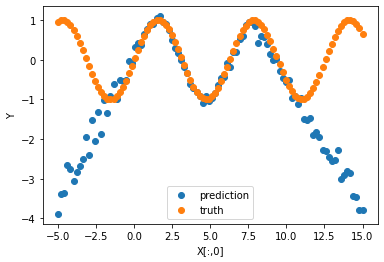

In [27]:
import time
optimizer=tf.keras.optimizers.Adam(lr=1e-3)
#optimizer=tf.keras.optimizers.RMSprop(lr=1e-3)
#optimizer=tf.keras.optimizers.SGD(lr=1e-4)
sine_model.compile(loss='mse',optimizer=optimizer)


reset_weights(sine_model)

i_time=time.time()
sine_model.fit(X,Y,epochs=10,validation_split=0.5,batch_size=10) #Have Keras make a test/validation split for us

print(time.time()-i_time)

Y_pred=sine_model.predict(X_test)
plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()

# What did you see ?

Does the code run faster or slower with a larger batch size?
   * Is the loss better or worse
Which optimizer gives the best results (SGD, Adam, RMSProp)?
   * What is the effect of the learning rate on each optimizer
    


## Overfitting

Overfitting is when a model memorizes it's training data. If your training data is noisy this is a problem because it tries to recreate meaningless bumps and wiggles. This hurts the preformance on new data! 
* Since overfitting hurts preformance on new data, we can use a witheld chunk of data to check for it

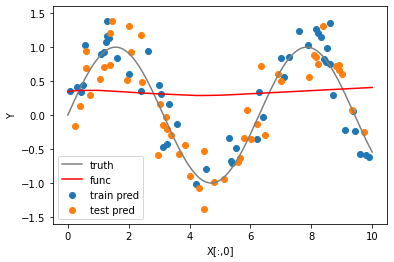

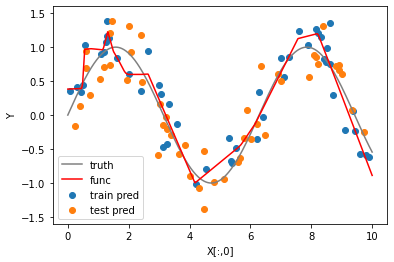

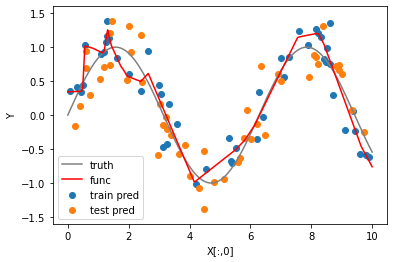

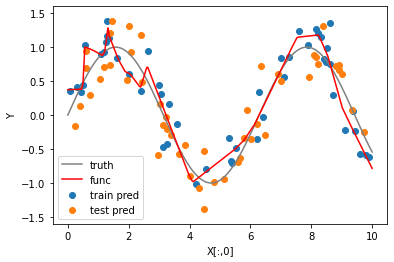

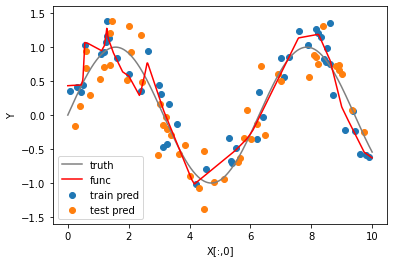

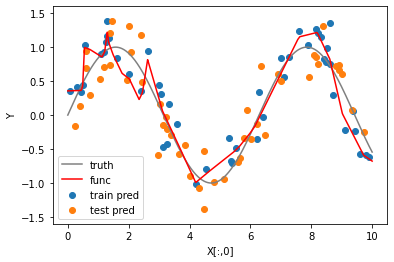

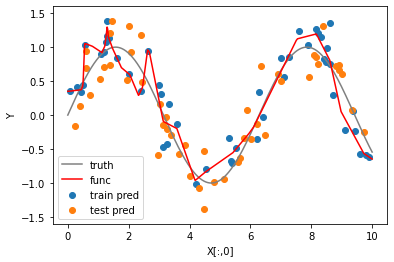

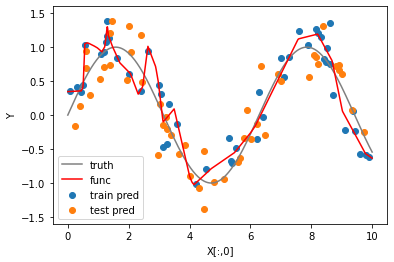

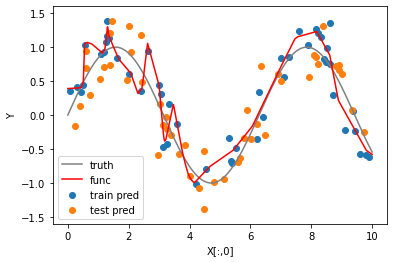

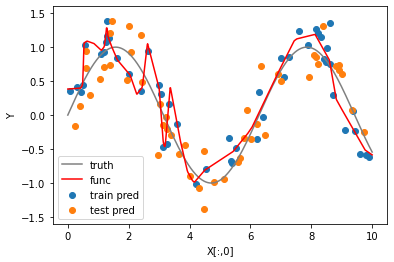

In [28]:
# All models start out with an input layer

data_dim=1
optimizer=tf.keras.optimizers.SGD(1e-4)
optimizer=tf.keras.optimizers.Adam()#(1e-4)

X=np.random.uniform(0,10,size=(100,data_dim))
x_plot=np.random.uniform(0,10,size=(1000,data_dim))
x_plot[:,0]=np.linspace(0,10,1000)

def func(X,noise=True):
    return np.sin(X[:,0])+np.random.normal(0,.3,size=(X[:,0].shape))*int(noise)  # #Ignore all other input have the output only depend on the first dimention


Y=func(X)
y_true=func(x_plot,noise=False)
split=int(0.5*len(X))
x_train=X[0:split]
y_train=Y[0:split]


x_test=X[split:]
y_test=Y[split:]


input_layer=tf.keras.layers.Input(shape=(data_dim,)) 

hidden_layer = tf.keras.layers.Dense(40)(input_layer)
activation_layer = tf.keras.layers.Activation('relu')(hidden_layer)

hidden_layer = tf.keras.layers.Dense(40)(activation_layer)
activation_layer = tf.keras.layers.Activation('relu')(hidden_layer)


hidden_layer = tf.keras.layers.Dense(40)(activation_layer)
activation_layer = tf.keras.layers.Activation('relu')(hidden_layer)


hidden_layer = tf.keras.layers.Dense(40)(activation_layer)
activation_layer = tf.keras.layers.Activation('relu')(hidden_layer)



output_layer = tf.keras.layers.Dense(1)(activation_layer)
#A keras model is a way of going from one layer to the next
sine_model=tf.keras.models.Model(input_layer,output_layer)

sine_model.compile(loss='mse',optimizer=optimizer)

batch_size=32

test_loss=[]
train_loss=[]

for i in range(500):
    
    history=sine_model.fit(x_train,y_train,epochs=int(50//(len(x_train)/batch_size)),batch_size=batch_size,verbose=0) #Have Keras make a test/validation split for us
    y_pred=sine_model.predict(x_test)[:,0]
    y_plot=sine_model.predict(x_plot)[:,0]
    y_predt=sine_model.predict(x_train)[:,0]

    test_loss.append(np.mean((y_pred-y_test)**2))
    train_loss.append(np.mean((y_predt-y_train)**2))

    if i %50==0:

        plt.scatter(x_train[:,0],y_train,label='train pred')
        plt.scatter(x_test[:,0],y_test,label='test pred')

        plt.plot(x_plot[:,0],y_true,color='gray',label='truth')
        plt.plot(x_plot[:,0],y_plot,label='func',color='red')
   
    
        plt.ylim((-1.6,1.6))
        plt.xlabel('X[:,0]')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

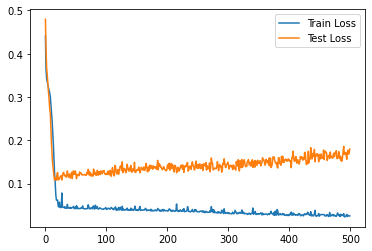

In [29]:
plt.plot(train_loss,label='Train Loss')
plt.plot(test_loss,label='Test Loss')
plt.legend()
plt.show()



### One of the easiets ways to prevent overfitting is to train for fewer epochs (or fewer steps)
### The more data you have the harder it is to overfit 

# Real Problem MPG problem

Lets look at a real world dataset. This datasets has a number of features about vechicles. The question is based on this data can we predict a vechilce MPG?

In [30]:
import pandas as pd

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv('/gpfs/projects/bgmp/shared/2019_ML_workshop/datasets/mpg/auto-mpg.data', names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)




In [31]:
Y=raw_dataset['MPG']
X=raw_dataset[['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']]

In [32]:
print(Y[0:10])
print(X[0:10])
# what 

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: MPG, dtype: float64
   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   
5          8         429.0       198.0  4341.0          10.0          70   
6          8         454.0       220.0  4354.0           9.0          70   
7          8         440.0       215.0  4312.0           8.5          70   
8          8         455.0       225.0  4425.0          10.0          70   
9          8         390.0       190.0  3850.0           8.5          70   

   Origin  
0       1  
1       1  
2

In [33]:

optimizer=tf.keras.optimizers.Adam()#(1e-4)


input_layer=tf.keras.layers.Input(shape=(7,)) 
normalizer = tf.keras.layers.Normalization(axis=-1)(input_layer)

hidden_layer = tf.keras.layers.Dense(64)(input_layer)
activation_layer = tf.keras.layers.Activation('relu')(hidden_layer)

hidden_layer = tf.keras.layers.Dense(64)(activation_layer)
activation_layer = tf.keras.layers.Activation('relu')(hidden_layer)

output_layer = tf.keras.layers.Dense(1)(activation_layer)
#A keras model is a way of going from one layer to the next
MPG_model=tf.keras.models.Model(input_layer,output_layer)
MPG_model.summary()
MPG_model.compile(loss='mse',optimizer=optimizer)

batch_size=32

MPG_model.fit(X,Y,validation_split=0.5,epochs=100)


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 7)]               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                512       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
________________________________________________________

# Nan :(
A lot of real world data needs to be cleaned up before it can be used in a neural network
* Missing data or data with Nans need to be removed
* Input features need to be normalized by subtracting the mean, and dividing by the standard deviation
* Categorical Variables need to be One-Hot encoded


In [34]:
## Normalization and Data Cleaning

print(np.isnan(X).any())


Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool


In [35]:

#Clean Nan Values

cleaner_dataset=raw_dataset.dropna()
cleaner_dataset['Origin_text'] = cleaner_dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# Encode Orgin into a one-hot or dummy encoding
cleaner_dataset=pd.get_dummies(cleaner_dataset, columns=['Origin_text'], prefix='', prefix_sep='')

# Split dataset using Pandas
train_dataset = cleaner_dataset.sample(frac=0.8, random_state=0)
test_dataset = cleaner_dataset.drop(train_dataset.index)

Y=train_dataset['MPG']
X=train_dataset[['Cylinders','Displacement','Horsepower','Weight','Acceleration','USA','Europe','Japan','Model Year']]

Y_test=test_dataset['MPG']
X_test=test_dataset[['Cylinders','Displacement','Horsepower','Weight','Acceleration','USA','Europe','Japan','Model Year']]


print(len(X))
print(np.isnan(X).any())
print(np.isnan(Y).any())



optimizer=tf.keras.optimizers.Adam(1e-2)


input_layer=tf.keras.layers.Input(shape=(9,)) 
#New Keras Layer Does the Normalization for you!!!
normalizer = tf.keras.layers.Normalization(axis=-1)(input_layer)

hidden_layer = tf.keras.layers.Dense(64)(normalizer)
activation_layer = tf.keras.layers.Activation('elu')(hidden_layer)
#activation_layer = tf.keras.layers.LeakyReLU()(hidden_layer)

hidden_layer = tf.keras.layers.Dense(64)(activation_layer)
activation_layer = tf.keras.layers.Activation('elu')(hidden_layer)

output_layer = tf.keras.layers.Dense(1)(activation_layer)
#A keras model is a way of going from one layer to the next
MPG_model=tf.keras.models.Model(input_layer,output_layer)
MPG_model.summary()
MPG_model.compile(loss='mse',optimizer=optimizer)


history=MPG_model.fit(X,Y,validation_split=0.2,epochs=200,verbose=0)






314
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
USA             False
Europe          False
Japan           False
Model Year      False
dtype: bool
False
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
normalization_1 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_29 (Dense)             (None, 64)                640       
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
____________________________________

/tmp/ipykernel_32410/3416731147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaner_dataset['Origin_text'] = cleaner_dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


## Some plots you should look at
* History of training and validation loss - Is the model overfit?
* Histogram of truth-prediction - are there outliers how good is the prediction?
* Scatter Chart of Truth vs. Prediction - Is there any trend to your errors?

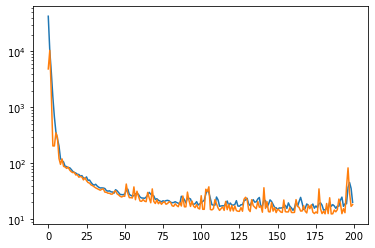

(78,) (314,)


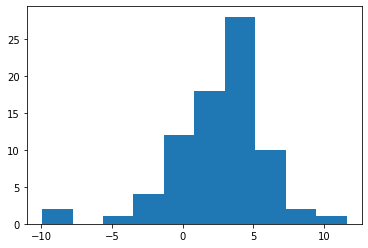

2.6509563274872607
3.3584542911186084


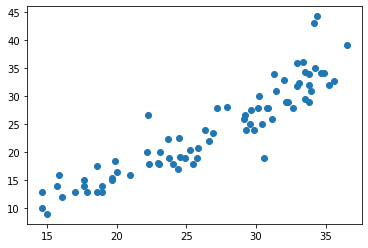

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.show()
Y_pred=MPG_model.predict(X_test)[:,0]
print(Y_pred.shape,Y.shape)
plt.show()

prediction=plt.hist(Y_pred-Y_test)
plt.show()
print(np.mean(Y_pred-Y_test))
print(np.std(Y_pred-Y_test))
plt.scatter(Y_pred,Y_test)
